In [1]:
from Modules.classes import * 
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt

In [2]:
H = Hamiltonian(dim = 10, emax = 1) # define random hamiltonian
dt = 1 / (np.abs(H.energies.max()) * 10 )# dt value much smaller than lower energy in the system
t_f = 100 # time of integration

In [3]:
cmap_nodes = 'coolwarm' # color of nodes
cmap_edges = 'hsv' # color of edges
state_v = np.random.choice(np.linspace(-1j, 1j, 1000), size = H.dim) # initialize random vector
state_v = np.zeros(H.dim, complex)
state_v[0] = 1
state_v = state_v / np.linalg.norm(state_v) # normalize initial vector
state = State(state_v, H, networkx = True, col_map_nodes = cmap_nodes, col_map_edges = cmap_edges) # construct state object

states = state.propagate(H, dt = dt, t_final = t_f, networkx = True, sim_tol = 0, 
                         col_map_nodes = cmap_nodes,
                        col_map_edges = cmap_edges) # propagating intial state

Propagating: 100%|██████████████████████████| 1717/1717 [00:29<00:00, 58.95it/s]



KeyboardInterrupt



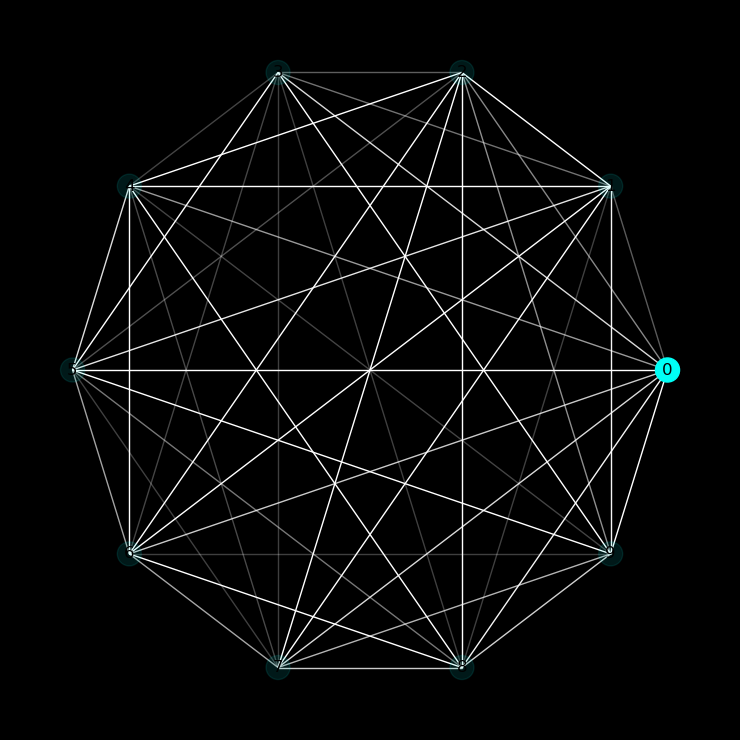

In [4]:
# Animating state graph
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
fig.set_facecolor("black")
ax.set_facecolor("black")

G = states[0].state_graph
layout = nx.circular_layout(G)

nx.draw_networkx_edges(G, layout, edgelist = dict(G.edges).keys(),
                       alpha = [G.edges[edge]["alpha"] for edge in dict(G.edges).keys()],
                       edge_color = "white")
nx.draw_networkx_nodes(G, layout,
                       alpha = [G.nodes[node]["alpha"] for node in dict(G.nodes).keys()],
                       node_color = [G.nodes[node]["color"] for node in dict(G.nodes).keys()])
nx.draw_networkx_labels(G,layout)

def animate(frame):
   ax.clear()
   G = states[frame].state_graph
   nx.draw_networkx_edges(G, layout, edgelist = dict(G.edges).keys(),
                          alpha = [G.edges[edge]["alpha"] for edge in dict(G.edges).keys()],
                          edge_color = "white")
   nx.draw_networkx_nodes(G, layout,
                          alpha = [G.nodes[node]["alpha"] for node in dict(G.nodes).keys()],
                          node_color = [G.nodes[node]["color"] for node in dict(G.nodes).keys()])
   anim = nx.draw_networkx_labels(G, layout)
ani = FuncAnimation(fig, animate, frames=len(states), interval=100, repeat=False)
writergif = PillowWriter(fps=80)
ani.save('state.gif', writer = writergif) 
plt.show()

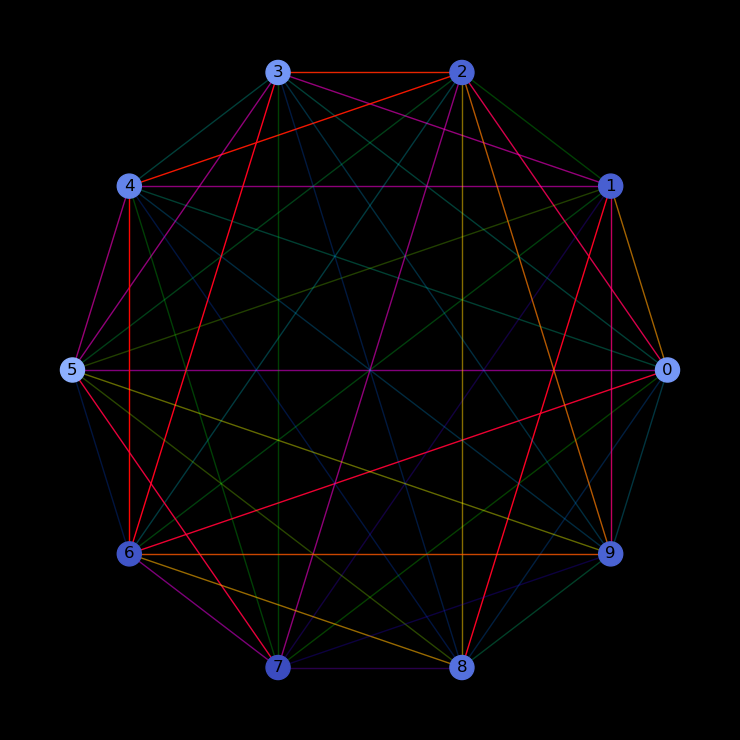

In [5]:
# Animating density matrix state graph
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
fig.set_facecolor("black")
ax.set_facecolor("black")

G = states[0].dense_graph
layout = nx.circular_layout(G)

nx.draw_networkx_edges(G, layout, edgelist = dict(G.edges).keys(), 
                       alpha = [G.edges[edge]["alpha"] for edge in dict(G.edges).keys()],
                       edge_color = [G.edges[edge]["color"] for edge in dict(G.edges).keys()],
                       edge_cmap = plt.get_cmap(cmap_edges),
                       edge_vmin = -np.pi, edge_vmax = np.pi)
nx.draw_networkx_nodes(G, layout,
                       node_color = [G.nodes[node]["color"] for node in dict(G.nodes).keys()],
                       #node_color = "white",
                       #alpha = [G.nodes[node]["alpha"] for node in dict(G.nodes).keys()]
                      )
nx.draw_networkx_labels(G,layout)

def animate(frame):
   ax.clear()
   G = states[frame].dense_graph
   nx.draw_networkx_edges(G, layout, edgelist = dict(G.edges).keys(), 
                       alpha = [G.edges[edge]["alpha"] for edge in dict(G.edges).keys()],
                       edge_color = [G.edges[edge]["color"] for edge in dict(G.edges).keys()],
                       edge_cmap = plt.get_cmap(cmap_edges),
                       edge_vmin = -np.pi, edge_vmax = np.pi)
   nx.draw_networkx_nodes(G, layout,
                          node_color = [G.nodes[node]["color"] for node in dict(G.nodes).keys()],
                          #node_color = "white",
                          #alpha = [G.nodes[node]["alpha"] for node in dict(G.nodes).keys()]
                         )
   anim = nx.draw_networkx_labels(G, layout)

ani = FuncAnimation(fig, animate, frames=len(states), interval=100, repeat=False)
writergif = PillowWriter(fps=80)
ani.save('density.gif', writer = writergif) 
plt.show()